In [1]:
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/TrainingByPackt/Big-Data-Analysis-with-Python/master/Lesson01/RadNet_Laboratory_Analysis.csv"
df = pd.read_csv(url)


In [2]:
columns = df.columns
id_cols = ['State', 'Location', "Date Posted", 'Date Collected', 'Sample Type', 'Unit']
columns = list(set(columns) - set(id_cols))
columns


['Cs-134',
 'Ba-140',
 'Te-129',
 'Co-60',
 'I-133',
 'I-131',
 'Te-132',
 'Cs-136',
 'Cs-137',
 'I-132',
 'Te-129m',
 'Ba-140.1']

In [3]:
df['Cs-134'] = df['Cs-134'].apply(lambda x: np.nan if x == "Non-detect" else x)
df.loc[:, columns] = df.loc[:, columns].applymap(lambda x: np.nan if x == 'Non-detect' else x)
df.loc[:, columns] = df.loc[:, columns].applymap(lambda x: np.nan if x == 'ND' else x)


In [4]:
df.loc[:, ['State', 'Location', 'Sample Type', 'Unit']] = df.loc[:, ['State', 'Location', 'Sample Type', 'Unit']].applymap(lambda x: x.strip())

In [5]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Collected'] = pd.to_datetime(df['Date Collected'])


In [6]:
for col in columns:
    df[col] = pd.to_numeric(df[col])


In [7]:
df['State'] = df['State'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Unit'] = df['Unit'].astype('category')
df['Sample Type'] = df['Sample Type'].astype('category')


In [8]:
df.loc[df.Location == 'San Bernardino'].plot(x='Date Collected', y='I-131')


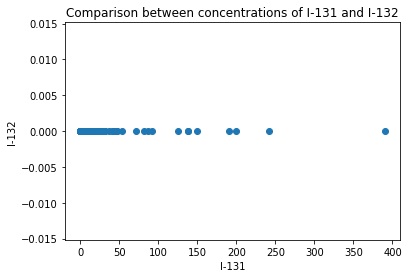

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x=df['I-131'], y=df['I-132'])
_ = ax.set(
    xlabel='I-131',
    ylabel='I-132',
    title='Comparison between concentrations of I-131 and I-132'
)
